In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as py
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split


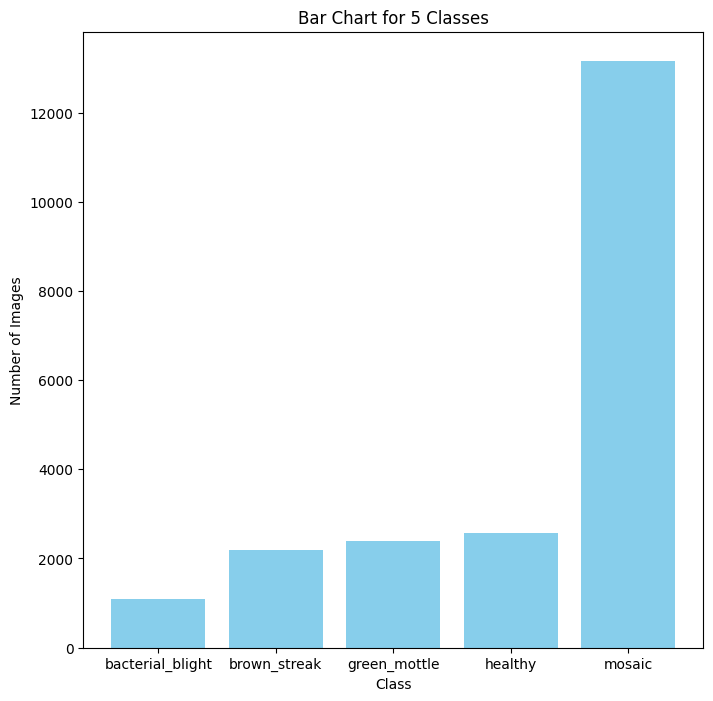

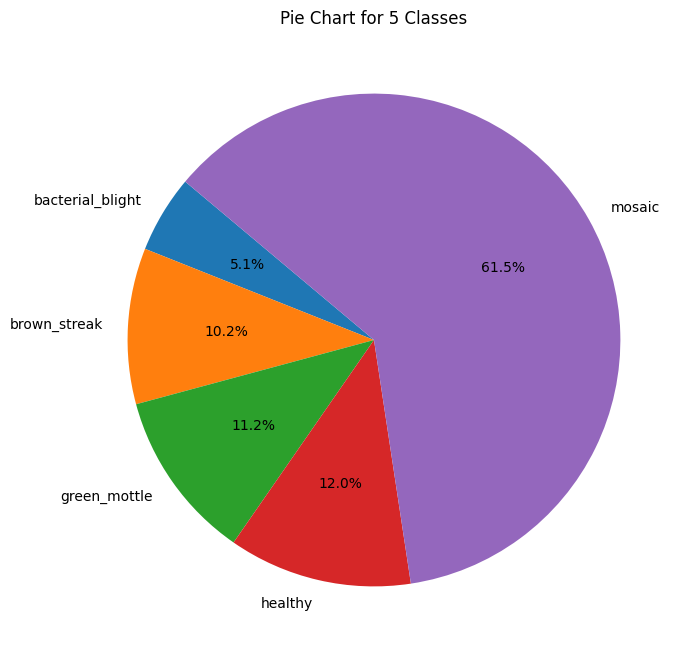

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Assuming your dataset directory structure is like: dataset/class1/, dataset/class2/, ...
dataset_directory = '/content/drive/MyDrive/extracted/data'
class_names = ['bacterial_blight', 'brown_streak', 'green_mottle', 'healthy', 'mosaic']

# Function to count the number of files in a directory
def count_files(directory):
    return len([filename for filename in os.listdir(directory) if os.path.isfile(os.path.join(directory, filename))])

# Count the number of images in each class
class_sizes = [count_files(os.path.join(dataset_directory, class_name)) for class_name in class_names]

# Bar Chart
plt.figure(figsize=(8, 8))
plt.bar(class_names, class_sizes, color='skyblue')
plt.title('Bar Chart for 5 Classes')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(class_sizes, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart for 5 Classes')
plt.show()


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

main_directory = '/content/drive/MyDrive/data'
# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Use ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Set the validation split
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify 'training' for training data
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    main_directory,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' for validation data
)

# Define your CNN model using TensorFlow's Keras API
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 4 classes for diseases
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Set the number of epochs
)


Found 17120 images belonging to 5 classes.
Found 4277 images belonging to 5 classes.
Epoch 1/10
535/535 [==============================] - 445s 826ms/step - loss: 1.1809 - accuracy: 0.6193 - val_loss: 1.0219 - val_accuracy: 0.6262
Epoch 2/10
535/535 [==============================] - 481s 899ms/step - loss: 0.9930 - accuracy: 0.6361 - val_loss: 0.9264 - val_accuracy: 0.6527
Epoch 3/10
535/535 [==============================] - 425s 795ms/step - loss: 0.9094 - accuracy: 0.6527 - val_loss: 0.8733 - val_accuracy: 0.6624
Epoch 4/10
535/535 [==============================] - 423s 791ms/step - loss: 0.8665 - accuracy: 0.6751 - val_loss: 0.8820 - val_accuracy: 0.6703
Epoch 5/10
535/535 [==============================] - 419s 784ms/step - loss: 0.8286 - accuracy: 0.6883 - val_loss: 0.8381 - val_accuracy: 0.6805
Epoch 6/10
535/535 [==============================] - 477s 892ms/step - loss: 0.8065 - accuracy: 0.6976 - val_loss: 0.8142 - val_accuracy: 0.6823
Epoch 7/10
535/535 [===================

In [ ]:
model.save("/content/drive/MyDrive")


In [ ]:
evaluation_result = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])

133/133 [==============================] - 84s 630ms/step - loss: 0.8085 - accuracy: 0.7002
Validation Loss: 0.8085159063339233
Validation Accuracy: 0.7001879811286926


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 classes for your task

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Set the number of epochs
)

# Evaluate the model on the validation set
evaluation_result = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])


58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/10
535/535 [==============================] - 442s 809ms/step - loss: 1.1297 - accuracy: 0.6065 - val_loss: 0.9465 - val_accuracy: 0.6147
Epoch 2/10
535/535 [==============================] - 488s 913ms/step - loss: 1.0326 - accuracy: 0.6147 - val_loss: 0.9351 - val_accuracy: 0.6163
Epoch 3/10
535/535 [==============================] - 434s 812ms/step - loss: 1.0177 - accuracy: 0.6149 - val_loss: 0.9210 - val_accuracy: 0.6161
Epoch 4/10
535/535 [==============================] - 432s 807ms/step - loss: 1.0118 - accuracy: 0.6149 - val_loss: 0.9234 - val_accuracy: 0.6147
Epoch 5/10
535/535 [==============================] - 480s 898ms/step - loss: 1.0028 - accuracy: 0.6149 - val_loss: 0.9272 - val_accuracy: 0.6151
Epoch 6/10
535/535 [==============================] - 415s 776ms/step - loss: 0.9988 - accuracy: 0.6149 - val_loss: 0.9163 - val_accuracy: 0.6158
Epoch 7/10
535/535 [==============================] - 479s 